In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Price vs. Performance**

In [2]:
def return_cost(n_instances, mode):
    if mode == 'm4.xlarge':
        n_cores = n_instances*2
        speedup = ((144/249))**(np.log2(n_instances)-1)
        time_taken = (20e6/200)*(249)*(speedup)
        time_taken = time_taken/3600
        cost = time_taken*((n_instances*0.2) + 0.06)
    elif mode == 'm4.10xlarge':
        n_cores = n_instances*20
        speedup = ((160/277))**(np.log2(n_instances)-1)
        time_taken = (20e6/2000)*(277)*(speedup)
        time_taken = time_taken/3600
        cost = time_taken*((n_instances*2) + 0.27)
    elif mode == 'm4.16xlarge':
        n_cores = n_instances*32
        speedup = ((129/195))**(np.log2(n_instances)-1)
        time_taken = (20e6/2000)*(195)*(speedup)
        time_taken = time_taken/3600
        cost = time_taken*((n_instances*3.2) + 0.27) 
    return cost, time_taken

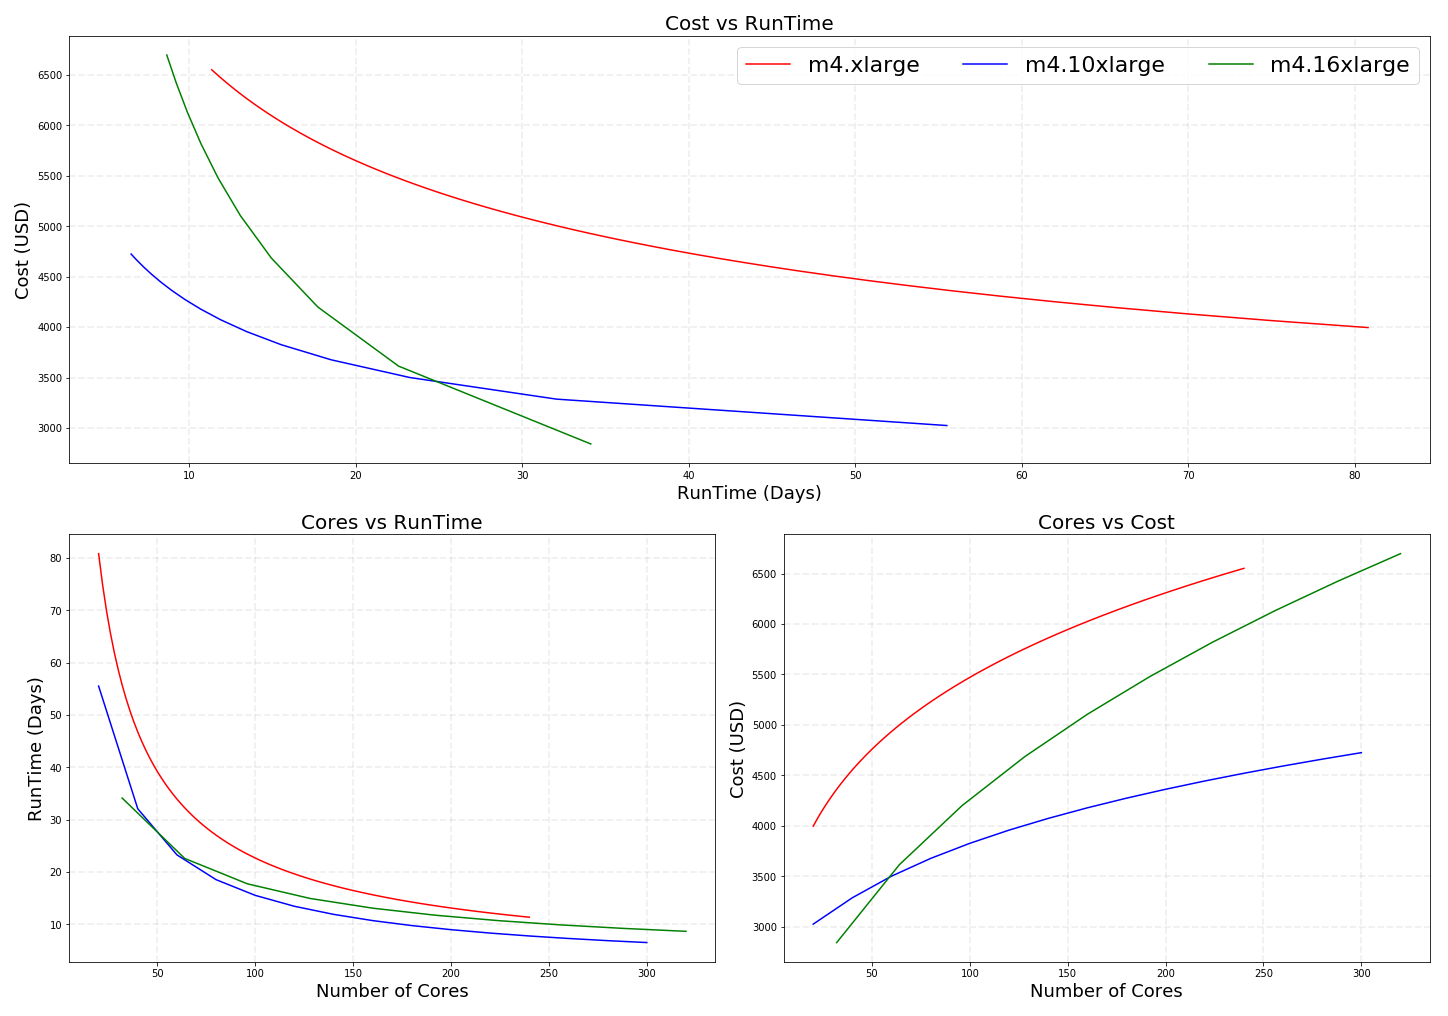

In [5]:
from matplotlib.gridspec import GridSpec
instances = [np.arange(10, 121), np.arange(1, 16), np.arange(1,11)]
modes = ['m4.xlarge', 'm4.10xlarge', 'm4.16xlarge']
colors = ['r', 'b', 'g']
cores = [2, 20, 32]

#figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 7))
figure = plt.figure(constrained_layout=True, figsize = (20, 14))
gs = GridSpec(4, 4, figure=figure)
ax1 = figure.add_subplot(gs[:2, :])
ax2 = figure.add_subplot(gs[2:, :2])
ax3 = figure.add_subplot(gs[2:, 2:])
#plt.suptitle('Price vs Performance Calculation for Different Infrastructures', size = 22, y = 1)
for j, mode in enumerate(modes):
    costs = []
    times = []
    for i in instances[j]:
        cost, time_taken = return_cost(i, mode = mode)
        times.append(time_taken/24)
        costs.append(cost)
    ax1.plot(times, costs, label = '{}'.format(mode), color = colors[j]);
    ax2.plot(instances[j]*cores[j], times, label = '{}'.format(mode), color = colors[j])
    ax3.plot(instances[j]*cores[j], costs, label = '{}'.format(mode), color = colors[j])
ax1.set_title('Cost vs RunTime', size = 20)
ax2.set_title('Cores vs RunTime', size = 20)
ax3.set_title('Cores vs Cost', size = 20)
ax1.set_xlabel('RunTime (Days)', size = 18)
ax1.set_ylabel('Cost (USD)', size = 18)
ax2.set_xlabel('Number of Cores', size = 18)
ax2.set_ylabel('RunTime (Days)', size = 18)
ax3.set_xlabel('Number of Cores', size = 18)
ax3.set_ylabel('Cost (USD)', size = 18)
ax1.grid(True, lw=1.75, ls='--', alpha=0.2)
ax2.grid(True, lw=1.75, ls='--', alpha=0.2)
ax3.grid(True, lw=1.75, ls='--', alpha=0.2)
ax1.legend(fontsize = 22, ncol = 3, loc = 'upper right')
plt.tight_layout()
#plt.savefig('../Desktop/price_performance_calc_final.jpg', dpi=300)
plt.show()

We extrapolate the improvements in runtime based on improvements made with fewer instances and cores. AWS wouldn't allow us to provision enough instances that would allow us to test these extrapolations. However we only extrapolated performance tested on 2-4 instances to up to 15 instances, and so although clusters of a larger size would have more overhead (and hence lower performance than we anticipate), we felt comfortable using these assumptions. 

We found that each of our instances had different optimal use models that relied on the number of instances provisioned. Because runtime and cost have non-linear relationships with number of instances (runtime is roughly inversely proportional to the number of instances provisioned), depending on the performance profile desired (i.e. runtime in a matter of days or weeks), different instances might be recommended to the user.

In particular - we found that using an EMR cluster consisting of larger instances (either `m4.10xlarge` or `m4.16xlarge`) was more efficient that using a cluster of smaller instances (`m4.xlarge`). Intuitively this makes sense since the overhead associated with multiple cores within an instance will be lower than the overhead associated with multiple cores amongst different instances. We found that for a user seeking to save money, running our program on a few `m4.16xlarge` instances made sense (although the code would take close to a month to run), but if speed was of the essence, using a large cluster of `m4.10xlarge` instances would prove to be more efficient. This is perhaps because of the fact that for this instance (with 20 cores), a balance is being struck between the communication overheads within and amongst the cores on different instances.

Overall we believe that this cost vs. performance profile will prove to be useful to potential users, helping them determine which infrastructure model to use based on their needs and budget.